In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


# Files

### boro.csv
This contains rates of confirmed cases, by NYC borough of residence. Rates are:
- Cumulative since the start of the outbreak
- Age adjusted according to [the US 2000 standard population](https://www.cdc.gov/nchs/data/statnt/statnt20.pdf)
- Per 100,000 people in the borough

In [3]:
url = 'https://github.com/nychealth/coronavirus-data/raw/master/boro.csv'

by_boro = pd.read_csv(url)

In [4]:
by_boro.head(10)

,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE
0,The Bronx,35398,2405.65
1,Brooklyn,41327,1523.20
2,Manhattan,19499,1035.55
3,Queens,48382,1931.92
4,Staten Island,11424,2273.91
5,Citywide,156100,NaN


In [5]:
bar_plot = by_boro.sort_values(by = 'COVID_CASE_COUNT', ascending=True)

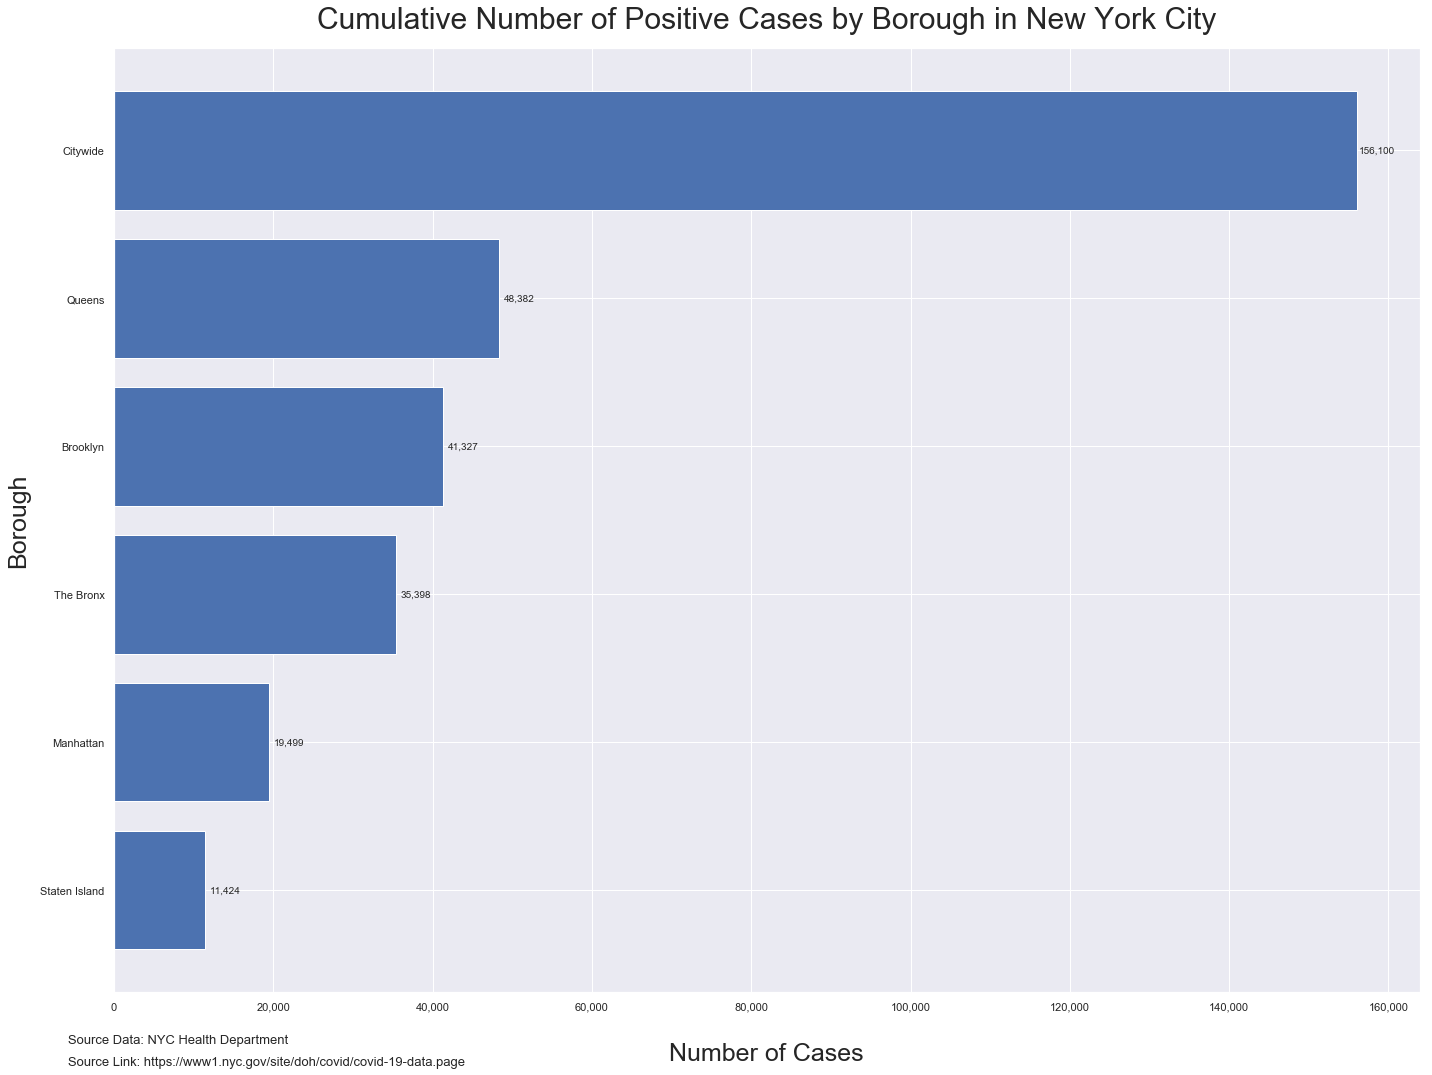

In [6]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.BOROUGH_GROUP, bar_plot['COVID_CASE_COUNT'])
plt.xlabel("Number of Cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Borough", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Cumulative Number of Positive Cases by Borough in New York City", pad=20, fontsize=30)
plt.tight_layout()

### by-age.csv
This contains age-specific  rates of confirmed cases, hospitalizations, and deaths.

In [7]:
url = 'https://github.com/nychealth/coronavirus-data/raw/master/by-age.csv'

In [8]:
by_age = pd.read_csv(url)

In [9]:
by_age.head(10)

,AGE_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
0,0-17 years,201.98,15.63,0.29
1,18-44 years,1705.26,167.58,14.21
2,45-64 years,2799.35,681.70,127.43
3,65-74 years,2795.67,1304.79,412.52
4,75 and older years,3242.38,2009.78,1045.39
5,Citywide total,1858.61,476.86,139.40


In [10]:
bar_plot = by_age.sort_index(ascending=False)

In [11]:
bar_plot

,AGE_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
5,Citywide total,1858.61,476.86,139.40
4,75 and older years,3242.38,2009.78,1045.39
3,65-74 years,2795.67,1304.79,412.52
2,45-64 years,2799.35,681.70,127.43
1,18-44 years,1705.26,167.58,14.21
0,0-17 years,201.98,15.63,0.29


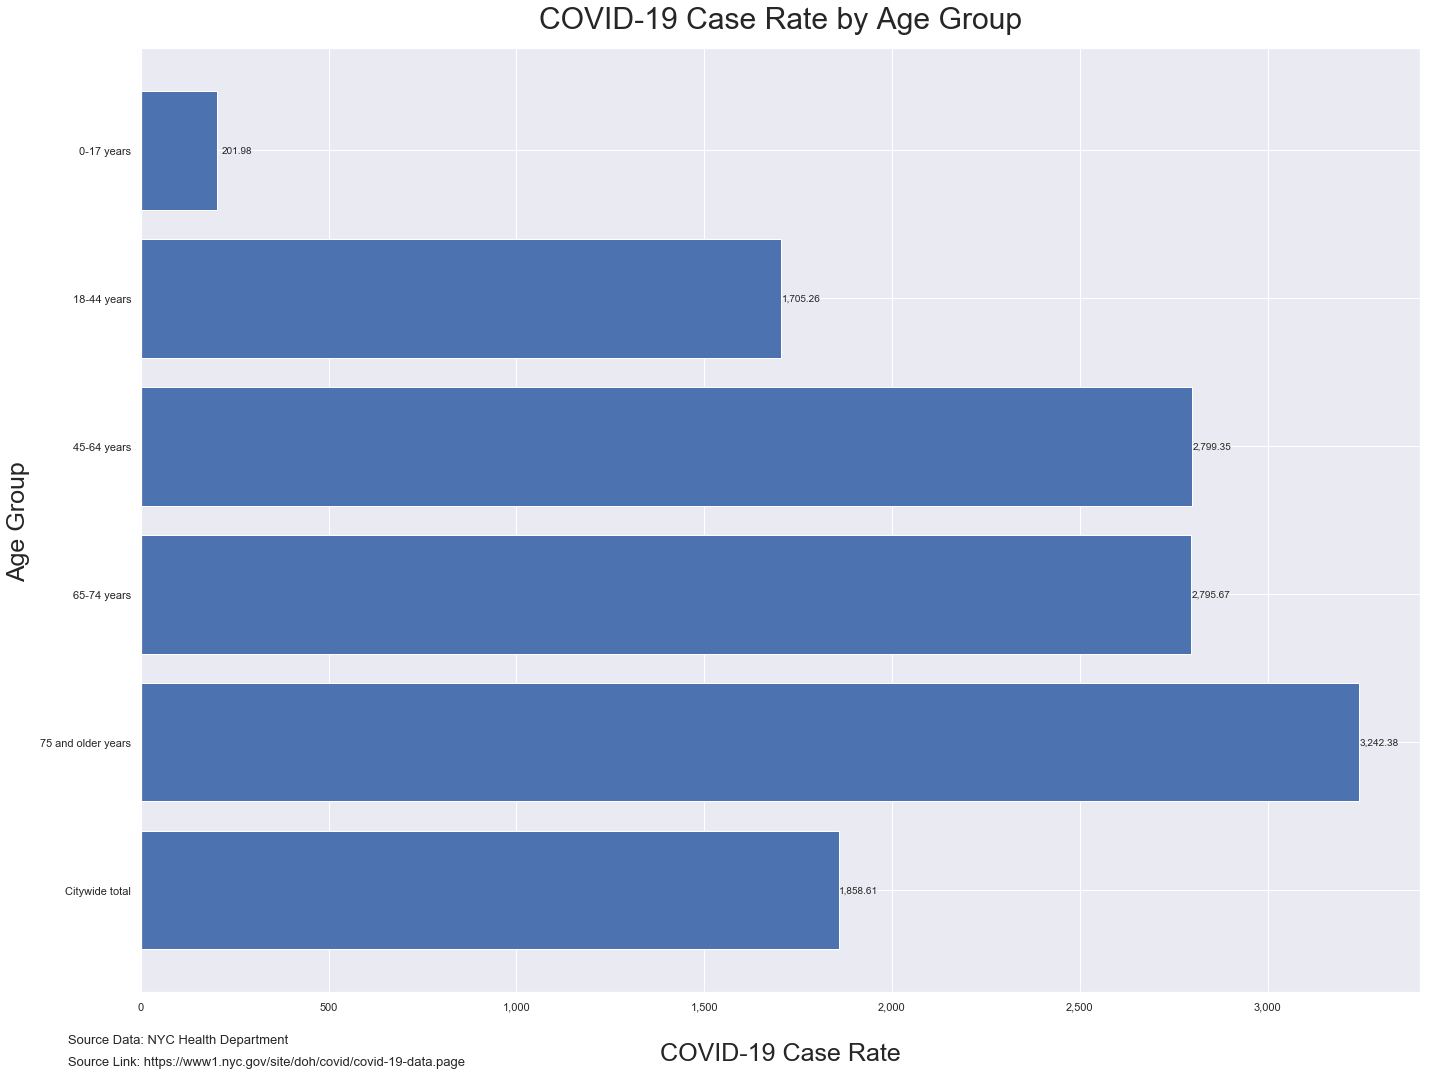

In [12]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.AGE_GROUP, bar_plot['COVID_CASE_RATE'])
plt.xlabel("COVID-19 Case Rate", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Age Group", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("COVID-19 Case Rate by Age Group", pad=20, fontsize=30)
plt.tight_layout()

### by-sex.csv
This contains rates of confirmed cases, hospitalizations, and deaths.

In [13]:
url = 'https://github.com/nychealth/coronavirus-data/raw/master/by-sex.csv'

In [14]:
by_sex = pd.read_csv(url)

In [15]:
by_sex.head()

,SEX_GROUP,COVID_CASE_RATE,HOSPITALIZED_CASE_RATE,DEATH_RATE
0,Female,1706.25,378.58,104.17
1,Male,2018.34,584.00,177.44
2,Citywide total,1858.61,476.86,139.40


In [16]:
bar_plot = by_sex.sort_index(ascending=False)

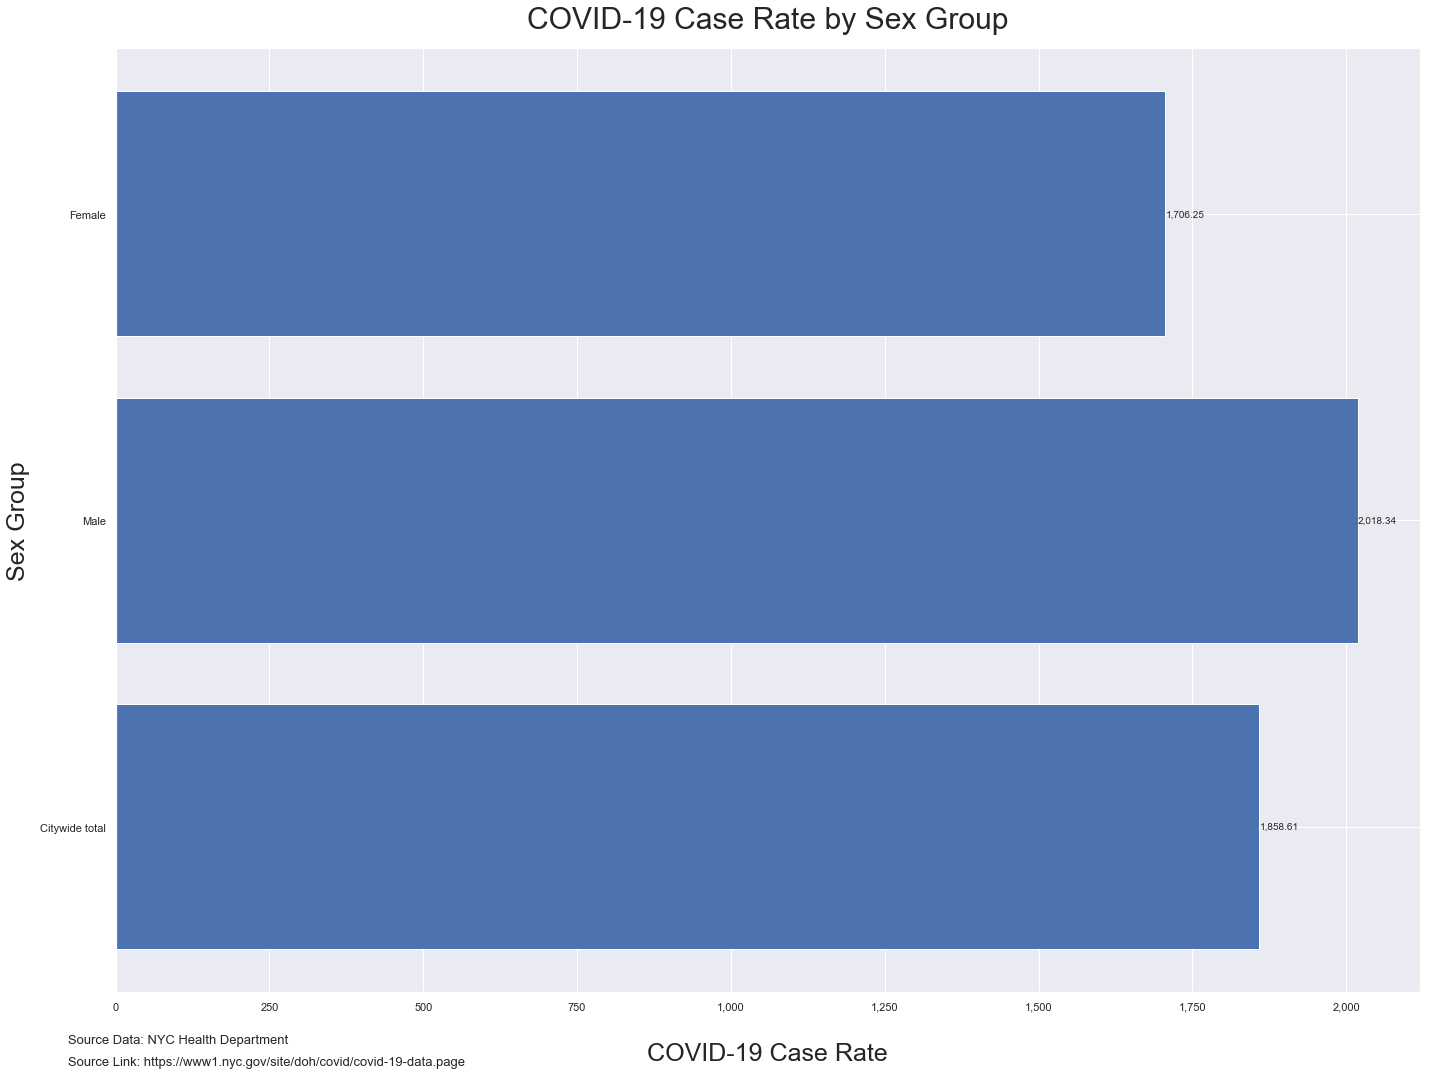

In [17]:
plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar_plot.SEX_GROUP, bar_plot['COVID_CASE_RATE'])
plt.xlabel("COVID-19 Case Rate", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("Sex Group", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("COVID-19 Case Rate by Sex Group", pad=20, fontsize=30)
plt.tight_layout()

### case-hosp-death.csv
This file includes daily counts of new confirmed cases, hospitalizations, and deaths. 
- Cases are by date of diagnosis
- Hospitalizations are by date of admission 
- Deaths are by date of death

Because of delays in reporting, the most recent data may be incomplete. Data shown currently will be updated in the future as new cases, hospitalizations, and deaths are reported.

In [18]:
url = 'https://github.com/nychealth/coronavirus-data/raw/master/case-hosp-death.csv'

In [19]:
case_hosp_death = pd.read_csv(url)

In [20]:
case_hosp_death.head()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/3/20,2,7.0,NaN
1,3/4/20,5,10.0,NaN
2,3/5/20,3,14.0,NaN
3,3/6/20,7,11.0,NaN
4,3/7/20,7,10.0,NaN


In [21]:
case_hosp_death['DATE_OF_INTEREST'] = pd.to_datetime(case_hosp_death['DATE_OF_INTEREST'], 
                                          infer_datetime_format=True)

In [22]:
case_hosp_death.dtypes

DATE_OF_INTEREST           datetime64[ns]
NEW_COVID_CASE_COUNT                int64
HOSPITALIZED_CASE_COUNT           float64
DEATH_COUNT                       float64
dtype: object

In [23]:
case_hosp_death['NewDate'] = case_hosp_death.DATE_OF_INTEREST.dt.strftime("%m-%d")

In [24]:
case_hosp_death.head()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT,NewDate
0,2020-03-03,2,7.0,NaN,03-03
1,2020-03-04,5,10.0,NaN,03-04
2,2020-03-05,3,14.0,NaN,03-05
3,2020-03-06,7,11.0,NaN,03-06
4,2020-03-07,7,10.0,NaN,03-07


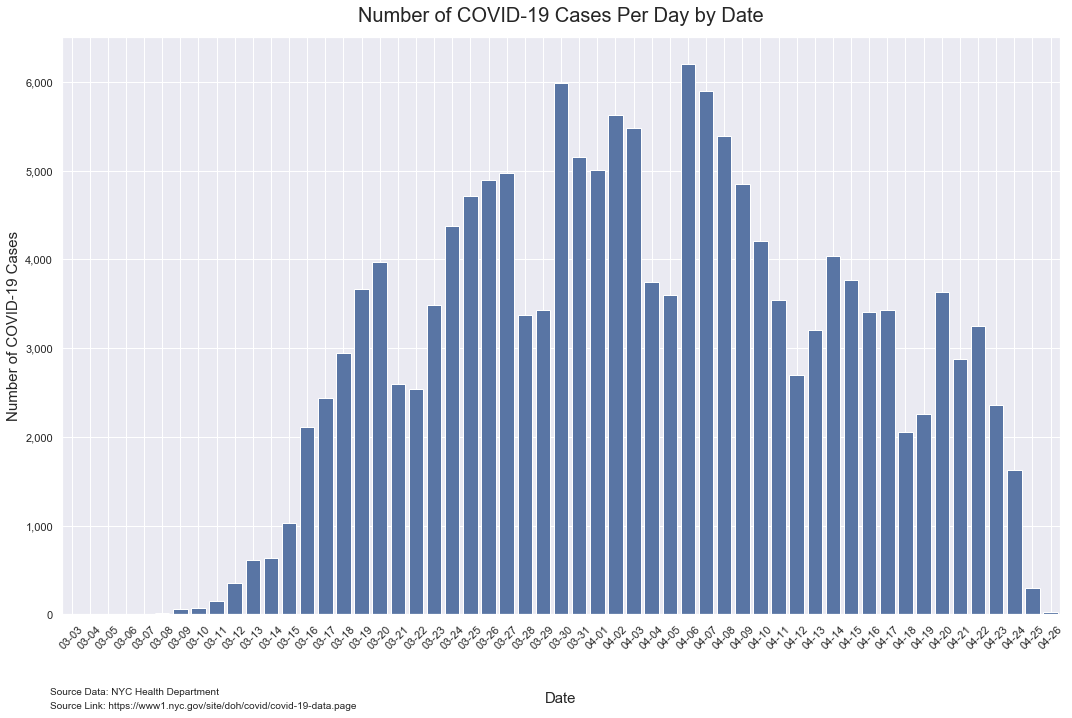

In [25]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.barplot(x="NewDate", 
            y="NEW_COVID_CASE_COUNT",
            color="C0",
            data=case_hosp_death)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=45)

#ax1.legend_.remove()
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of COVID-19 Cases', fontsize=15)
plt.title('Number of COVID-19 Cases Per Day by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [26]:
case_hosp_death['3_day_rolling_average'] = case_hosp_death.NEW_COVID_CASE_COUNT.rolling(3).mean()

In [27]:
case_hosp_death.head()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT,NewDate,3_day_rolling_average
0,2020-03-03,2,7.0,NaN,03-03,NaN
1,2020-03-04,5,10.0,NaN,03-04,NaN
2,2020-03-05,3,14.0,NaN,03-05,3.333333
3,2020-03-06,7,11.0,NaN,03-06,5.000000
4,2020-03-07,7,10.0,NaN,03-07,5.666667


In [28]:
case_hosp_death['3_day_rolling_average'].fillna(0, inplace=True)

In [29]:
case_hosp_death.head()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT,NewDate,3_day_rolling_average
0,2020-03-03,2,7.0,NaN,03-03,0.000000
1,2020-03-04,5,10.0,NaN,03-04,0.000000
2,2020-03-05,3,14.0,NaN,03-05,3.333333
3,2020-03-06,7,11.0,NaN,03-06,5.000000
4,2020-03-07,7,10.0,NaN,03-07,5.666667


In [30]:
case_hosp_death.tail()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT,NewDate,3_day_rolling_average
50,2020-04-22,3255,301.0,217.0,04-22,3256.000000
51,2020-04-23,2360,131.0,201.0,04-23,2832.666667
52,2020-04-24,1625,60.0,145.0,04-24,2413.333333
53,2020-04-25,300,10.0,57.0,04-25,1428.333333
54,2020-04-26,23,NaN,7.0,04-26,649.333333


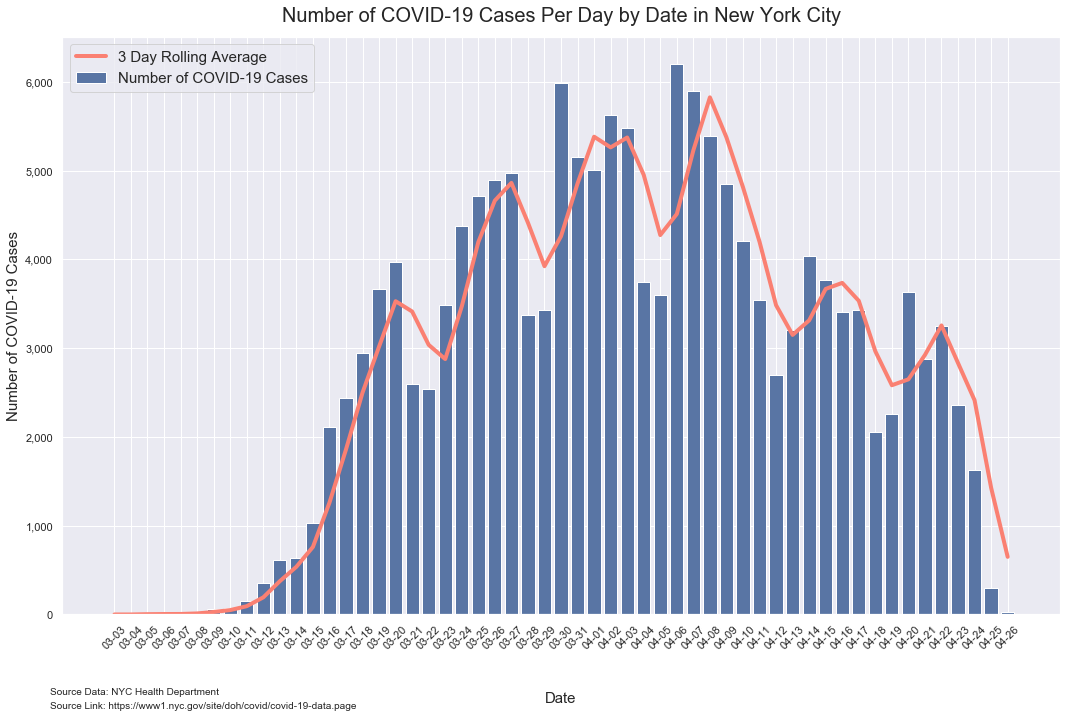

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.barplot(x="NewDate", 
            y="NEW_COVID_CASE_COUNT",
            color="C0",
            data=case_hosp_death, 
            label='Number of COVID-19 Cases')

sns.lineplot(x="NewDate", 
            y="3_day_rolling_average",
            color="salmon",
            data=case_hosp_death, 
            linewidth=4, 
            label='3 Day Rolling Average')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('D'))
# ax1.xaxis.grid(True, which="major")
# ax1.xaxis.set_major_locator(dates.MonthLocator())
# ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

ax1.grid(True)
ax1.grid(axis='x', which='minor')
plt.xticks(rotation=45)

leg = ax1.legend(loc='upper left', fontsize=15)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of COVID-19 Cases', fontsize=15)
plt.title('Number of COVID-19 Cases Per Day by Date in New York City', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/epi_curve.png')

### summary.csv
This file contains summary information, including when the dataset was "cut" - the cut-off date and time for data included in this update. 

Estimated hospitalization counts reflect the total number of people ever admitted to a hospital, not currently admitted

In [32]:
url = 'https://github.com/nychealth/coronavirus-data/raw/master/summary.csv'

In [33]:
summary = pd.read_csv(url, names=["Name", "Value"])

In [34]:
summary.head()

,Name,Value
0,Cases:,156100
1,Hospitalized*:,40050
2,Confirmed,11708
3,Probable,5228
4,As of:,"April 27, at 1:00 p.m."


### tests-by-zcta.csv
This file includes the cumulative count of New York City residents by ZIP code of residence who:
- Were ever tested for COVID-19 (SARS-CoV-2) 
- Tested positive
The cumulative counts are as of the date of extraction from the NYC Health Department's disease surveillance database.

In [35]:
url = 'https://github.com/nychealth/coronavirus-data/raw/master/tests-by-zcta.csv'

In [36]:
tests_by_zcta = pd.read_csv(url)

In [37]:
tests_by_zcta.head()

,MODZCTA,Positive,Total,zcta_cum.perc_pos
0,NaN,1907,2171,87.84
1,10001.0,299,737,40.57
2,10002.0,808,1684,47.98
3,10003.0,378,1014,37.28
4,10004.0,26,77,33.77


## Surveillance Data

In [38]:
repiratory_surviellance_data = pd.read_csv('data/respiratory_surveillance_data.csv')

In [39]:
repiratory_surviellance_data.head()

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count
0,Respiratory,Borough,Bronx,Age Group,All age groups,1/1/16,307
1,Respiratory,Borough,Bronx,Age Group,All age groups,1/2/16,366
2,Respiratory,Borough,Bronx,Age Group,All age groups,1/3/16,316
3,Respiratory,Borough,Bronx,Age Group,All age groups,1/4/16,363
4,Respiratory,Borough,Bronx,Age Group,All age groups,1/5/16,302


In [40]:
repiratory_surviellance_data.shape

(54565, 7)

In [41]:
repiratory_surviellance_data['Count'] = repiratory_surviellance_data['Count'].str.replace(',', '')

In [42]:
repiratory_surviellance_data.Count = repiratory_surviellance_data.Count.astype(int)

In [43]:
repiratory_surviellance_data['date'] = pd.to_datetime(repiratory_surviellance_data['Date '], 
                                          infer_datetime_format='%m/%d/%Y')

In [44]:
all_age_groups = repiratory_surviellance_data.loc[repiratory_surviellance_data.Dim2Value == 'All age groups']

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


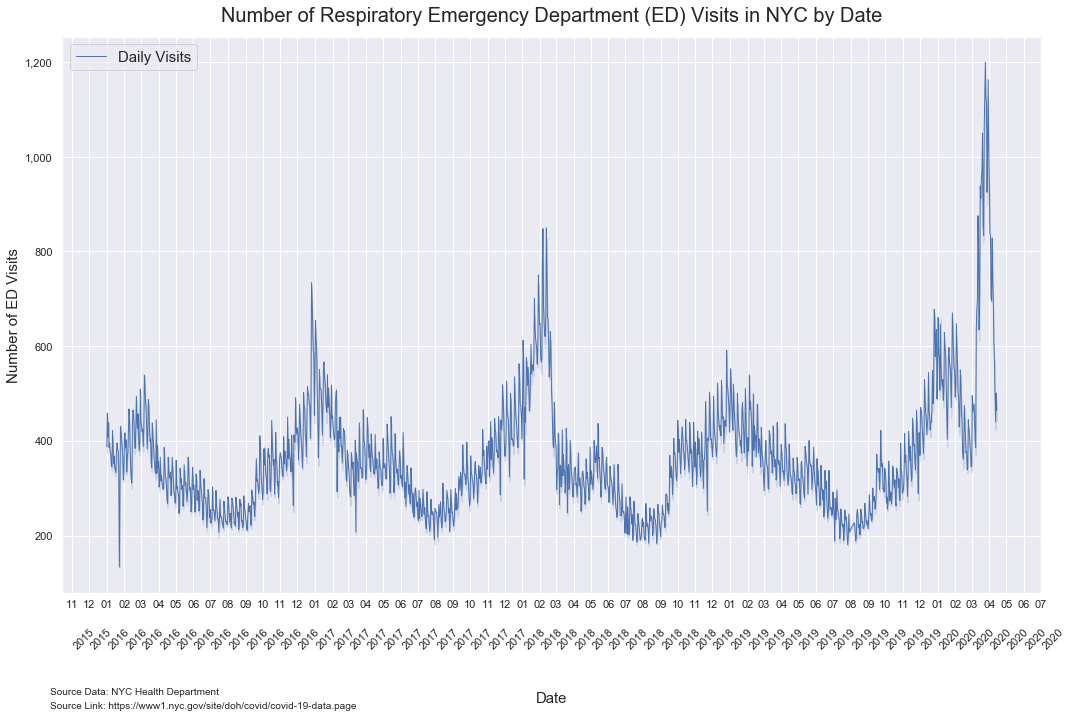

In [45]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.lineplot(x="date", 
            y="Count",
            color="C0",
            data=all_age_groups, 
            linewidth=1, 
            ci=False,
            label='Daily Visits')

ax1.xaxis.set_minor_locator(dates.MonthLocator())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%m'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

plt.xticks(rotation=45)
ax1.grid(axis='x', which='minor')

leg = ax1.legend(loc='upper left', fontsize=15)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of ED Visits', fontsize=15)
plt.title('Number of Respiratory Emergency Department (ED) Visits in NYC by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [46]:
all_age_groups['7_day_rolling_average'] = all_age_groups.Count.rolling(7).mean()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
all_age_groups.head(10)

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count,date,7_day_rolling_average
0,Respiratory,Borough,Bronx,Age Group,All age groups,1/1/16,307,2016-01-01,NaN
1,Respiratory,Borough,Bronx,Age Group,All age groups,1/2/16,366,2016-01-02,NaN
2,Respiratory,Borough,Bronx,Age Group,All age groups,1/3/16,316,2016-01-03,NaN
3,Respiratory,Borough,Bronx,Age Group,All age groups,1/4/16,363,2016-01-04,NaN
4,Respiratory,Borough,Bronx,Age Group,All age groups,1/5/16,302,2016-01-05,NaN
5,Respiratory,Borough,Bronx,Age Group,All age groups,1/6/16,339,2016-01-06,NaN
6,Respiratory,Borough,Bronx,Age Group,All age groups,1/7/16,322,2016-01-07,330.714286
7,Respiratory,Borough,Bronx,Age Group,All age groups,1/8/16,302,2016-01-08,330.000000
8,Respiratory,Borough,Bronx,Age Group,All age groups,1/9/16,266,2016-01-09,315.714286
9,Respiratory,Borough,Bronx,Age Group,All age groups,1/10/16,247,2016-01-10,305.857143


In [48]:
all_age_groups['7_day_rolling_average'].fillna(0, inplace=True)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [49]:
all_age_groups.head(10)

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count,date,7_day_rolling_average
0,Respiratory,Borough,Bronx,Age Group,All age groups,1/1/16,307,2016-01-01,0.000000
1,Respiratory,Borough,Bronx,Age Group,All age groups,1/2/16,366,2016-01-02,0.000000
2,Respiratory,Borough,Bronx,Age Group,All age groups,1/3/16,316,2016-01-03,0.000000
3,Respiratory,Borough,Bronx,Age Group,All age groups,1/4/16,363,2016-01-04,0.000000
4,Respiratory,Borough,Bronx,Age Group,All age groups,1/5/16,302,2016-01-05,0.000000
5,Respiratory,Borough,Bronx,Age Group,All age groups,1/6/16,339,2016-01-06,0.000000
6,Respiratory,Borough,Bronx,Age Group,All age groups,1/7/16,322,2016-01-07,330.714286
7,Respiratory,Borough,Bronx,Age Group,All age groups,1/8/16,302,2016-01-08,330.000000
8,Respiratory,Borough,Bronx,Age Group,All age groups,1/9/16,266,2016-01-09,315.714286
9,Respiratory,Borough,Bronx,Age Group,All age groups,1/10/16,247,2016-01-10,305.857143


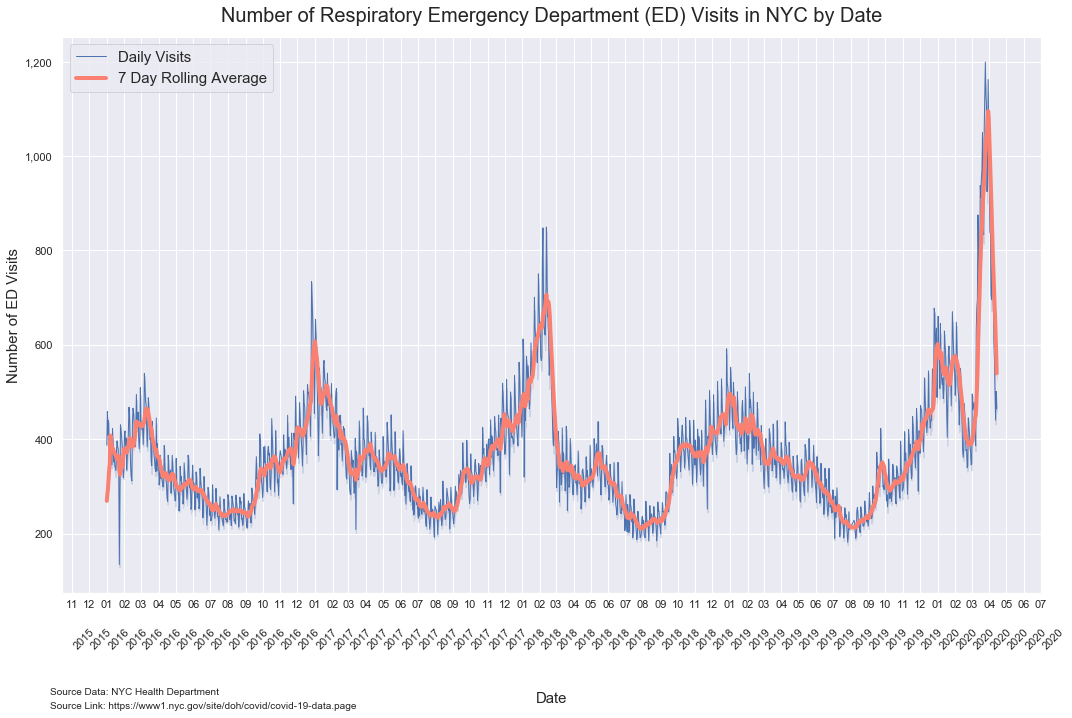

In [50]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.lineplot(x="date", 
            y="Count",
            color="C0",
            data=all_age_groups, 
            linewidth=1, ci=False,
            label = 'Daily Visits')

sns.lineplot(x="date", 
            y="7_day_rolling_average",
            color="salmon",
            data=all_age_groups,
            linewidth=4, 
            ci=False, 
            label = '7 Day Rolling Average')

ax1.xaxis.set_minor_locator(dates.MonthLocator())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%m'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

plt.xticks(rotation=45)
ax1.grid(axis='x', which='minor')

leg = ax1.legend(loc='upper left', fontsize=15)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of ED Visits', fontsize=15)
plt.title('Number of Respiratory Emergency Department (ED) Visits in NYC by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [51]:
infuenza_like_surveillance_data = pd.read_csv('data/influenza_like_surveillance_data.csv')

In [52]:
infuenza_like_surveillance_data.head()

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count
0,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/1/16,73
1,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/2/16,92
2,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/3/16,72
3,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/4/16,93
4,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/5/16,60


In [53]:
infuenza_like_surveillance_data.shape

(54565, 7)

In [54]:
infuenza_like_surveillance_data.Dim2Value.unique()

array(['All age groups', 'Ages 0-4 years', 'Ages 5-17 years',
       'Ages 18-64 years', 'Ages 65+ years'], dtype=object)

In [55]:
infuenza_like_surveillance_data.dtypes

Ind1Name     object
Dim1Name     object
Dim1Value    object
Dim2Name     object
Dim2Value    object
Date         object
Count        object
dtype: object

In [56]:
infuenza_like_surveillance_data['Count'] = infuenza_like_surveillance_data['Count'].str.replace(',', '')

In [57]:
infuenza_like_surveillance_data.Count = infuenza_like_surveillance_data.Count.astype(int)

In [58]:
infuenza_like_surveillance_data.dtypes

Ind1Name     object
Dim1Name     object
Dim1Value    object
Dim2Name     object
Dim2Value    object
Date         object
Count         int64
dtype: object

In [59]:
infuenza_like_surveillance_data.columns

Index(['Ind1Name', 'Dim1Name', 'Dim1Value', 'Dim2Name', 'Dim2Value', 'Date ',
       'Count'],
      dtype='object')

In [60]:
infuenza_like_surveillance_data['date'] = pd.to_datetime(infuenza_like_surveillance_data['Date '], 
                                          infer_datetime_format='%m/%d/%Y')

In [61]:
infuenza_like_surveillance_data['NewDate'] = infuenza_like_surveillance_data.date.dt.strftime("%m-%d")

In [62]:
infuenza_like_surveillance_data.head()

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count,date,NewDate
0,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/1/16,73,2016-01-01,01-01
1,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/2/16,92,2016-01-02,01-02
2,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/3/16,72,2016-01-03,01-03
3,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/4/16,93,2016-01-04,01-04
4,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/5/16,60,2016-01-05,01-05


In [63]:
all_age_groups = infuenza_like_surveillance_data.loc[infuenza_like_surveillance_data.Dim2Value == 'All age groups']

In [64]:
all_age_groups.head()

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count,date,NewDate
0,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/1/16,73,2016-01-01,01-01
1,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/2/16,92,2016-01-02,01-02
2,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/3/16,72,2016-01-03,01-03
3,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/4/16,93,2016-01-04,01-04
4,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/5/16,60,2016-01-05,01-05


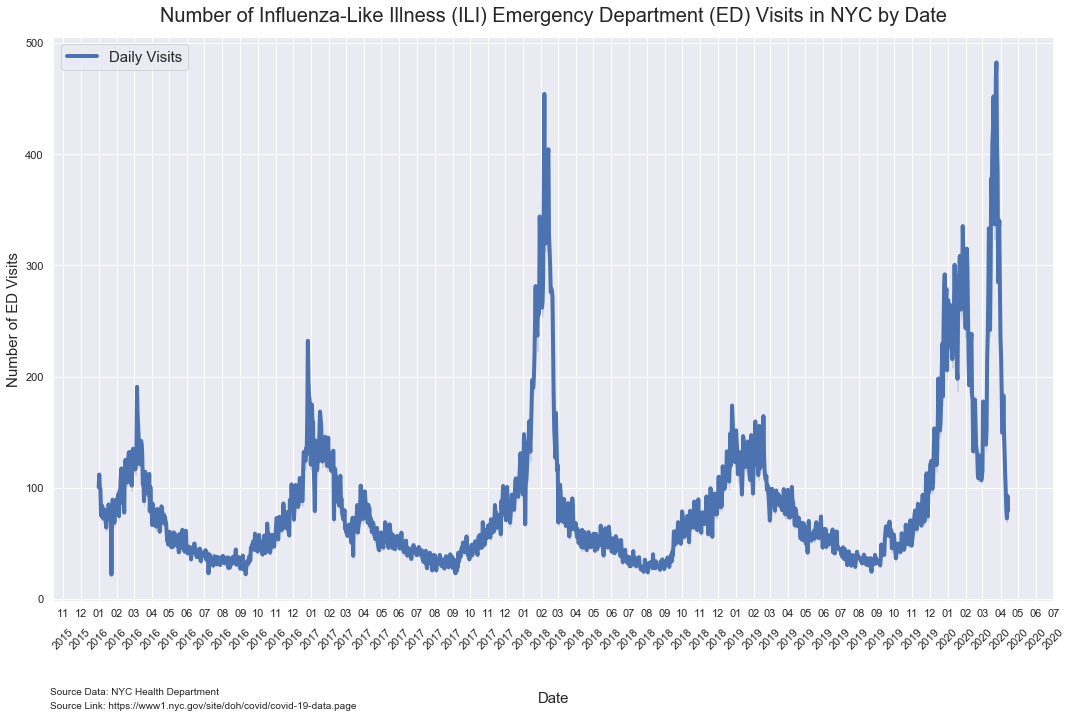

In [65]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.lineplot(x="date", 
            y="Count",
            color="C0",
            data=all_age_groups, linewidth=4, ci=False, label = 'Daily Visits')

ax1.xaxis.set_minor_locator(dates.MonthLocator())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%m'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

plt.xticks(rotation=45)
ax1.grid(axis='x', which='minor')
ax1.tick_params(axis='x', which='major', pad=20)

leg = ax1.legend(loc='upper left', fontsize=15)
                 
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of ED Visits', fontsize=15)
plt.title('Number of Influenza-Like Illness (ILI) Emergency Department (ED) Visits in NYC by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()

In [66]:
all_age_groups['7_day_rolling_average'] = all_age_groups.Count.rolling(7).mean()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
all_age_groups['7_day_rolling_average'].fillna(0, inplace=True)

In [68]:
all_age_groups.head()

,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count,date,NewDate,7_day_rolling_average
0,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/1/16,73,2016-01-01,01-01,0.0
1,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/2/16,92,2016-01-02,01-02,0.0
2,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/3/16,72,2016-01-03,01-03,0.0
3,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/4/16,93,2016-01-04,01-04,0.0
4,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,1/5/16,60,2016-01-05,01-05,0.0


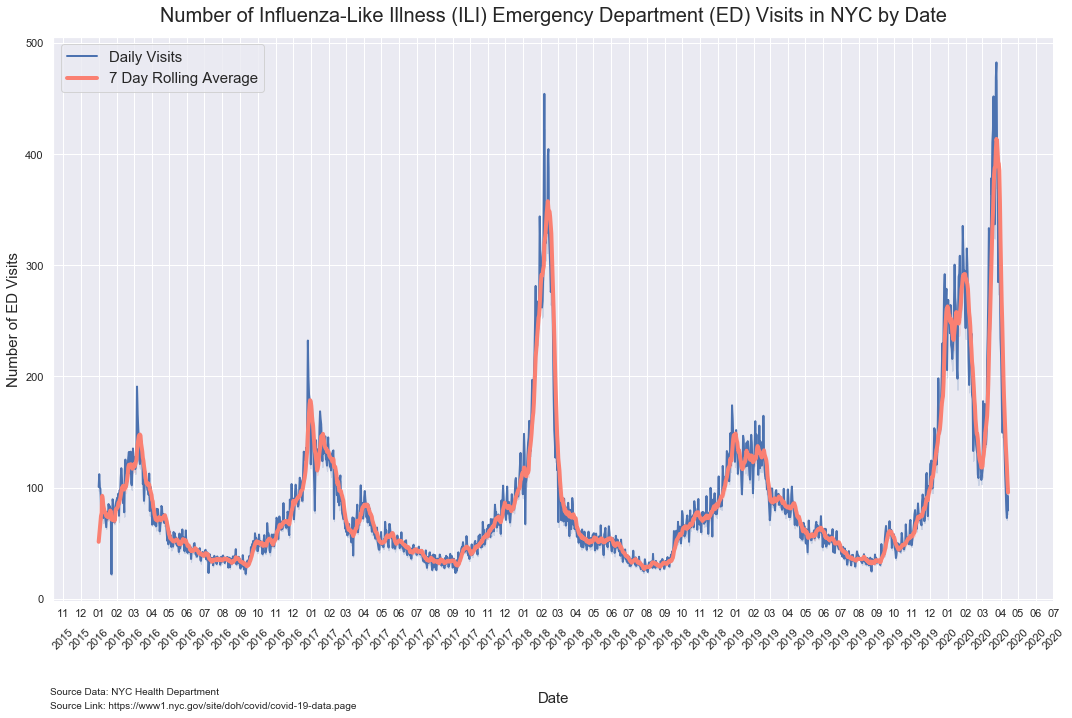

In [69]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: NYC Health Department')
txt2 = ('Source Link: https://www1.nyc.gov/site/doh/covid/covid-19-data.page')

sns.lineplot(x="date", 
            y="Count",
            color="C0",
            data=all_age_groups, linewidth=2, ci=False, label = 'Daily Visits')

sns.lineplot(x="date", 
            y="7_day_rolling_average",
            color="salmon",
            data=all_age_groups, linewidth=4, ci=False, label = '7 Day Rolling Average')

ax1.xaxis.set_minor_locator(dates.MonthLocator())
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%m'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 40

plt.xticks(rotation=45)
ax1.grid(axis='x', which='minor')
ax1.tick_params(axis='x', which='major', pad=20)

leg = ax1.legend(loc='upper left', fontsize=15)

ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of ED Visits', fontsize=15)
plt.title('Number of Influenza-Like Illness (ILI) Emergency Department (ED) Visits in NYC by Date', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()